In [ ]:
import numpy as np

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
path="/content/drive/MyDrive/POC_solutions/final_data_analyst-data.csv"
df=pd.read_csv(path)

# 1.**How many students are included in the dataset?**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4894 entries, 0 to 4893
Data columns (total 16 columns):
 #   Column                                                           Non-Null Count  Dtype  
---  ------                                                           --------------  -----  
 0   First Name                                                       4894 non-null   object 
 1   Email ID                                                         4894 non-null   object 
 2   Quantity                                                         4894 non-null   int64  
 3   Events                                                           4894 non-null   object 
 4   Attendee Status                                                  4894 non-null   int64  
 5   College Name                                                     4879 non-null   object 
 6   How did you come to know about this event?                       2678 non-null   object 
 7   Specify in "Others" (how did you come to k

In [ ]:
df.columns

Index(['First Name', 'Email ID', 'Quantity', 'Events', 'Attendee Status',
       'College Name', 'How did you come to know about this event?',
       'Specify in "Others" (how did you come to know about this event)',
       'Designation', 'Year of Graduation', 'City', 'CGPA',
       'Experience with python (Months)', 'Family Income',
       'Expected salary (Lac)', 'Leadership- skills'],
      dtype='object')

# 2. **What is the average GPA of the students?**

In [ ]:
mean_gpa = df['CGPA'].mean()
print("Mean CGPA:", mean_gpa)

Mean CGPA: 8.038475684511647


# 3. **What is the distribution of students across different graduation years?**

In [ ]:
year_distribution = df['Year of Graduation'].value_counts()

print(year_distribution)

2023    1536
2024    1511
2025    1292
2026     555
Name: Year of Graduation, dtype: int64


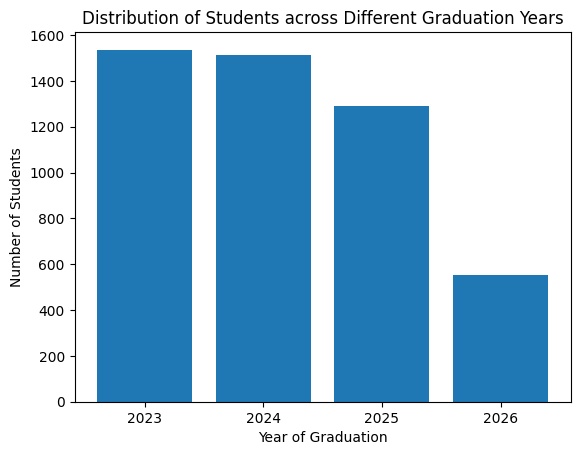

In [ ]:
plt.bar(year_distribution.index, year_distribution.values)
plt.xticks(year_distribution.index)
plt.xlabel('Year of Graduation')
plt.ylabel('Number of Students')
plt.title('Distribution of Students across Different Graduation Years')
plt.show()

# 4. **What is the distribution of student’s experience with Python programming?**

In [ ]:
experience_distribution = df['Experience with python (Months)'].value_counts()
print(experience_distribution)



5    1242
3    1008
8     800
6     738
7     640
4     466
Name: Experience with python (Months), dtype: int64


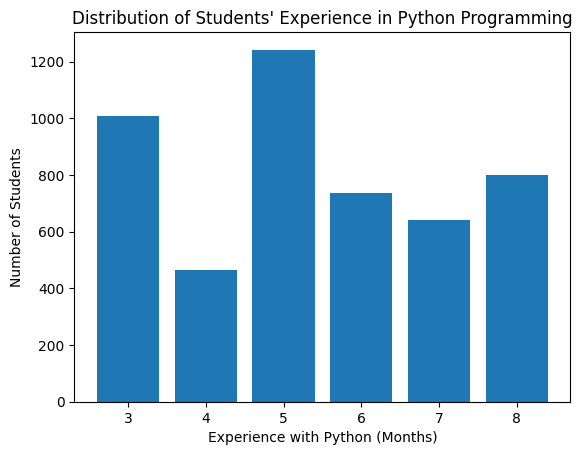

In [ ]:
experience_distribution = experience_distribution.sort_index()
plt.bar(experience_distribution.index, experience_distribution.values)
plt.xticks(experience_distribution.index)
plt.xlabel('Experience with Python (Months)')
plt.ylabel('Number of Students')
plt.title('Distribution of Students\' Experience in Python Programming')
plt.show()







# 5. **What is the average family income of the student?**

In [ ]:
income_mapping = {
    '0-2 Lakh': 2,
    '7 Lakh+': 7,
    '5-7 Lakh': 7,
    '2-5 Lakh': 5
}
df['Family Income'] = df['Family Income'].replace(income_mapping)

In [ ]:
average_income = df['Family Income'].mean()

print("Average Family Income:", average_income)

Average Family Income: 2.2952595014303228


# 6. **How does the average GPA vary among different colleges? ---Top 5**


In [ ]:
average_gpa_by_college = df.groupby('College Name')['CGPA'].mean().reset_index()
sorted_colleges = average_gpa_by_college.sort_values(by='CGPA', ascending=False)
top_5_colleges = sorted_colleges.head(5)
print(top_5_colleges)


                                         College Name      CGPA
23  THAKUR INSTITUTE OF MANAGEMENT STUDIES, CAREER...  8.585714
20                               St Xavier's College   8.578571
3   B. K. Birla College of Arts, Science & Commerc...  8.456410
22            Symbiosis Institute of Technology, Pune  8.303448
2                    AP SHAH INSTITUTE OF TECHNOLOGY   8.283333


# 7. **Are there any outliers in the quantity (number of courses completed) attribute?**

In [ ]:
course_counts = df['Events'].value_counts()
Q1 = course_counts.quantile(0.25)
Q3 = course_counts.quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Calculate the lower and upper bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers = course_counts[(course_counts < lower_bound) | (course_counts > upper_bound)]

print("Outliers in Quantity Obtained (Number of Students Taking Each Course):")
print(outliers)

Outliers in Quantity Obtained (Number of Students Taking Each Course):
Series([], Name: Events, dtype: int64)


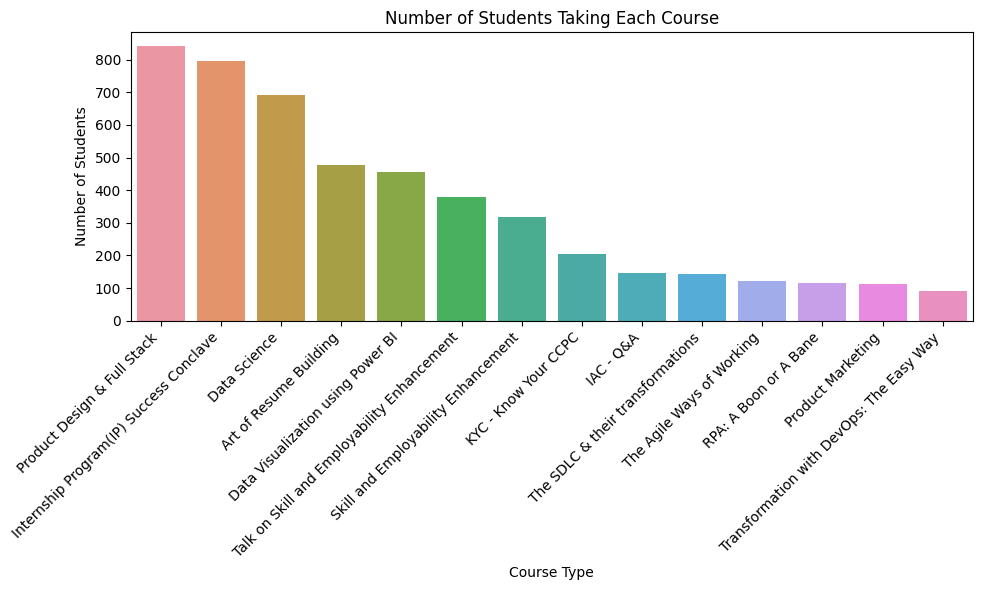

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=course_counts.index, y=course_counts.values)
plt.xlabel('Course Type')
plt.ylabel('Number of Students')
plt.title('Number of Students Taking Each Course')

# Highlight the outliers in red color
for idx in outliers.index:
    plt.text(course_counts.index.get_loc(idx), course_counts.loc[idx], f'{course_counts.loc[idx]} (Outlier)', color='red', ha='center', va='bottom')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Display the plot
plt.show()

# 8. **What is the average GPA for student from each city?**

In [ ]:
average_gpa_citywise = df.groupby('City')['CGPA'].mean()
print(average_gpa_citywise)

City
Agartala     7.660714
Agra         8.046429
Ahemdabad    8.190385
Ajmer        8.284314
Akola        8.021429
               ...   
Vidisha      7.738095
Vijaywada    7.986364
Wardha       8.328571
konark       8.071429
kullu        7.878571
Name: CGPA, Length: 177, dtype: float64


# 9. **Can we identify any relationship between family income and GPA?**

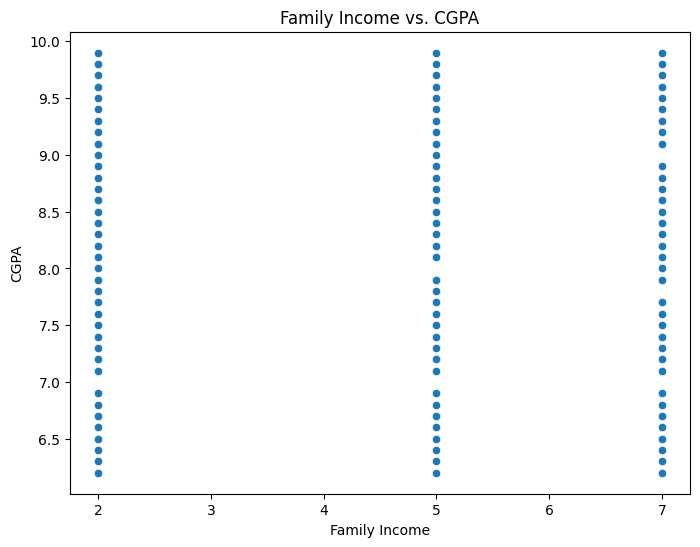

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Family Income', y='CGPA', data=df)
plt.xlabel('Family Income')
plt.ylabel('CGPA')
plt.title('Family Income vs. CGPA')
plt.show()

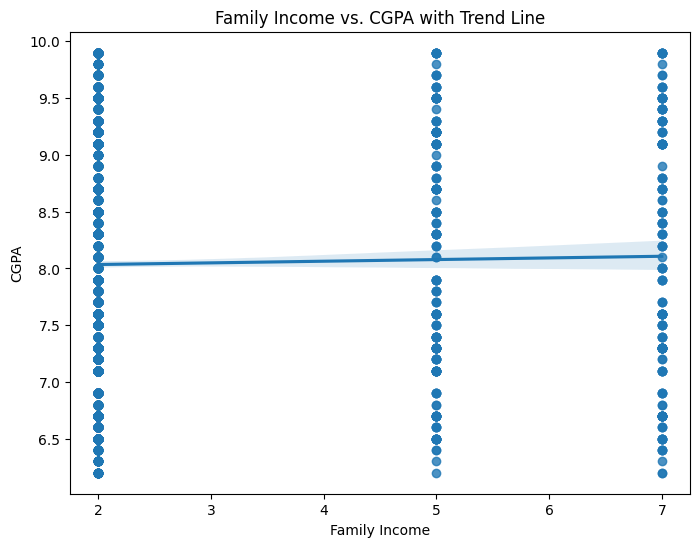

Correlation Coefficient: 0.01547302193101662


In [ ]:
income_mapping = {
    '0-2 Lakh': 2,
    '7 Lakh+': 7,
    '5-7 Lakh': 7,
    '2-5 Lakh': 5
}
df['Family Income'] = df['Family Income'].replace(income_mapping)
plt.figure(figsize=(8, 6))
sns.regplot(x='Family Income', y='CGPA', data=df)
plt.xlabel('Family Income')
plt.ylabel('CGPA')
plt.title('Family Income vs. CGPA with Trend Line')
plt.show()
correlation_coefficient = df['Family Income'].corr(df['CGPA'])
print("Correlation Coefficient:", correlation_coefficient)

# 10. **How many students from various cities.(solve using data visualisation tool).**

In [ ]:
city_counts = df['City'].value_counts()
city_counts_df = city_counts.reset_index()
city_counts_df.columns = ['City', 'Frequency']
print(city_counts_df)

            City  Frequency
0     Chandigarh         57
1          Siuri         56
2         Talmuk         56
3          Gonda         56
4          Sikar         52
5           Kota         52
6        Bikaner         52
7         Jaipur         52
8        Jhalwar         52
9        Jodhpur         52
10     Ahemdabad         52
11         Jalor         52
12          Pali         52
13        Amreli         52
14        Dwarka         52
15       Patiala         51
16        Barmer         51
17          Amer         51
18         Ajmer         51
19       Sangrur         51
20       Jalgaon         51
21      Amritsar         51
22      Buldhana         51
23    Aurangabad         51
24          Mahe         51
25      Bhandara         51
26       Bhsawal         51
27           Bid         51
28         Dhule         51
29        Kalyan         51
30         Thane         51
31   Navi Mumbai         51
32        Mumbai         51
33        Nagpur         51
34        Nanded    

# 11. **How does the expected salary vary based on factors like CGPA,family Income, months of experience in python language?**

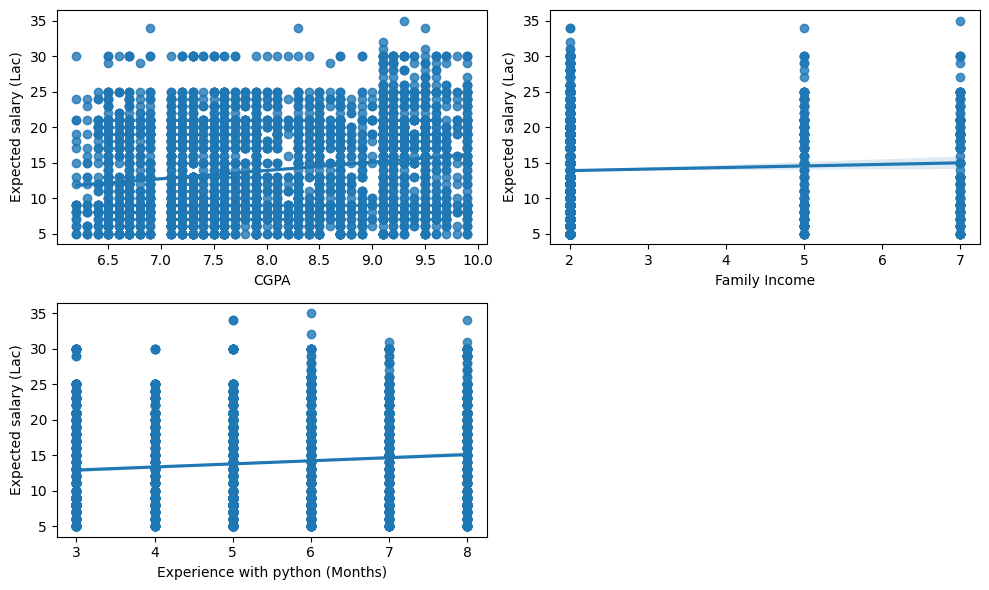

In [ ]:
plt.figure(figsize=(10, 6))

plt.subplot(2, 2, 1)
sns.regplot(x='CGPA', y='Expected salary (Lac)', data=df)

plt.subplot(2, 2, 2)
sns.regplot(x='Family Income', y='Expected salary (Lac)', data=df)

plt.subplot(2, 2, 3)
sns.regplot(x='Experience with python (Months)', y='Expected salary (Lac)', data=df)

plt.tight_layout()
plt.show()

# 12.**This is similar as question no.7.**

# 13. **Do students who are having leadership positions during their college years tend to have  higher GPAs or better expected salary?**

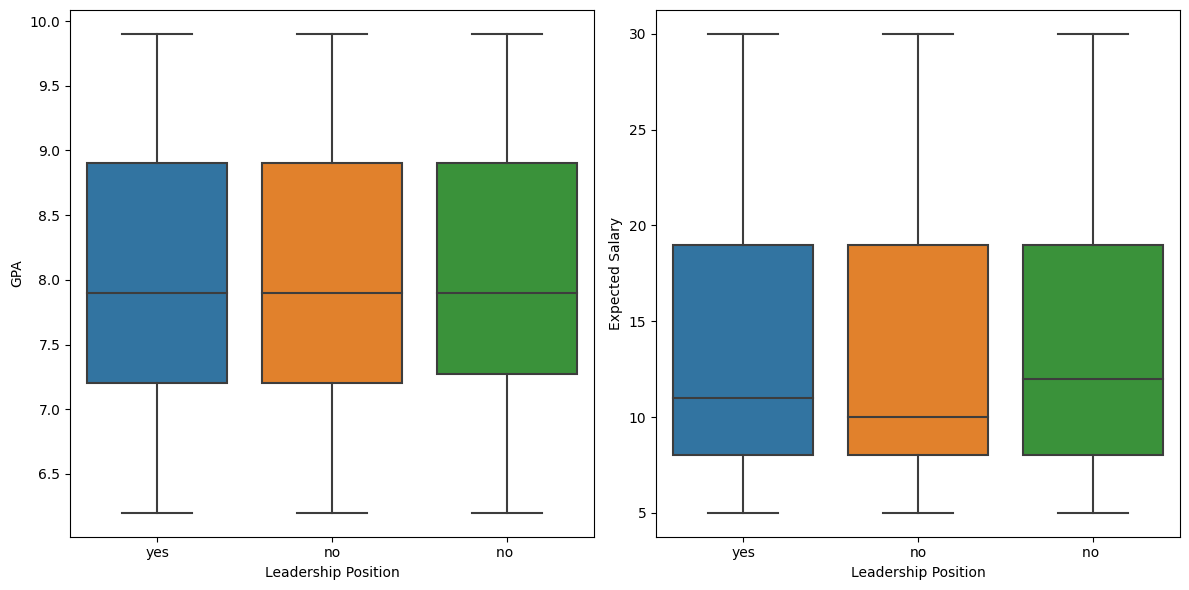

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='Leadership- skills', y='GPA', data=df)
plt.xlabel('Leadership Position')
plt.ylabel('GPA')

plt.subplot(1, 2, 2)
sns.boxplot(x='Leadership- skills', y='Expected salary (Lac)', data=df)
plt.xlabel('Leadership Position')
plt.ylabel('Expected Salary')

plt.tight_layout()

plt.show()

# 14. **It is same as second part of 13.**

# 15. **How many students are graduating by the end of 2024?**

In [ ]:
graduating_before_2024 = df[df['Year of Graduation'] <= 2024]

# Count the number of students graduating on or before 2024
number_of_students = len(graduating_before_2024)

# Print or display the result
print("Number of students graduating on or before 2024:", number_of_students)

Number of students graduating on or before 2024: 3047


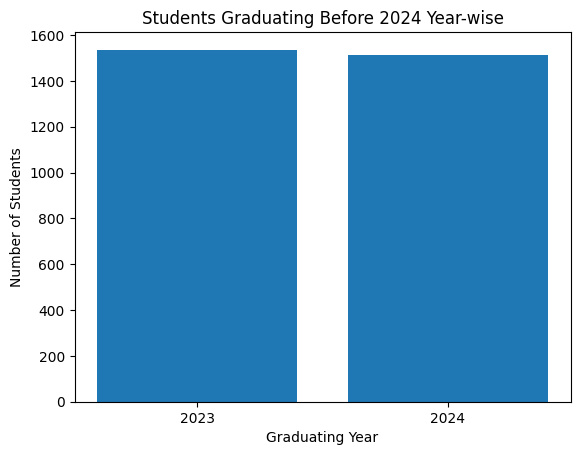

In [ ]:
graduating_before_2024 = df[df['Year of Graduation'] <= 2024]
year_counts = graduating_before_2024['Year of Graduation'].value_counts().sort_index()

# Create the plot
plt.bar(year_counts.index, year_counts.values)

# Set integer values on the x-axis
plt.xticks(year_counts.index, year_counts.index.astype(int))

plt.xlabel('Graduating Year')
plt.ylabel('Number of Students')
plt.title('Students Graduating Before 2024 Year-wise')
plt.show()

# 16. **Which marketing effects better in gaining attention from the students?**

In [ ]:
social_media_counts = df['How did you come to know about this event?'].value_counts()

# Get the top 5 marketing channels with the highest counts
top_10_social_media = social_media_counts.head(10)

# Print or display the top 5 marketing channels
print(top_10_social_media)

Whatsapp                              1067
Email                                  438
SPOC/ College Professor                326
Others                                 153
Cloud Counselage Website               129
Whatsapp | SPOC/ College Professor      67
LinkedIn                                55
Facebook                                48
Youtube                                 37
Friend/ Classmate                       30
Name: How did you come to know about this event?, dtype: int64


# 17. **Find the total number of students who attended the events related to Data Science**.

In [ ]:
data_science_attendees = df[df['Events'] == 'Data Science']

# Count the number of students who attended the Data Science course
number_of_attendees = len(data_science_attendees)

# Print or display the result
print("Total number of students who attended the Data Science course:", number_of_attendees)

Total number of students who attended the Data Science course: 693


In [ ]:
df.head()

,First Name,Email ID,Quantity,Events,Attendee Status,College Name,How did you come to know about this event?,"Specify in ""Others"" (how did you come to know about this event)",Designation,Year of Graduation,City,CGPA,Experience with python (Months),Family Income,Expected salary (Lac),Leadership- skills
0,ANIKET,aniket@xyz.com,1,Art of Resume Building,1,D Y PATIL INSTITUTE OF MCA AND MANAGEMENT AKUR...,Email,NaN,Students,2024,Patna,6.7,7,7,6,yes
1,Dhanshree,dhanshree@xyz.com,1,Art of Resume Building,1,AP SHAH INSTITUTE OF TECHNOLOGY,Others,College,Students,2024,Amravati,8.2,3,2,7,no
2,Dhiraj,dhiraj@xyz.com,1,Art of Resume Building,1,Don Bosco College of Engineering Fatorda Goa,Email,NaN,Students,2023,Kunrool,6.5,4,7,7,no
3,Pooja,pooja@xyz.com,1,Art of Resume Building,1,Pillai College of Engineering New Panvel,Email,NaN,Students,2025,Tirupati,8.7,7,5,8,no
4,Aayush,aayush@xyz.com,1,Art of Resume Building,1,St Xavier's College,Instagram | LinkedIn | Cloud Counselage Website,NaN,Students,2024,Vijaywada,9.1,3,2,10,yes


# 18.	**How many students know about the event from their colleges? Mention top 5 colleges for it.**

In [ ]:
college_attendees = df[df['How did you come to know about this event?'] == 'college']
college_counts = college_attendees['College Name'].value_counts()

top_5_colleges = college_counts.head(5)
print(top_5_colleges)

kle society's college of bca, rls institute, belagavi    21
vidyalankar institute of technology, mumbai              20
mit academy of engineering ,alandi                       20
ld college of engineering, ahmedabad, gujarat            18
wilson college                                           17
Name: College Name, dtype: int64


# 19.	**What is the average expected salary of students having more than 8.5 cgpa or having experience in python greater than 2 months?**

In [ ]:
filtered_data = df[df['CGPA'] > 8]

# Calculate the average expected salary for the filtered data
average_salary = filtered_data['Expected salary (Lac)'].mean()

# Print or display the average expected salary
print("Average expected salary of students with CGPA > 8:", average_salary)

Average expected salary of students with CGPA > 8: 14.883421985815604


In [ ]:
filtered_data = df[df['Experience with python (Months)'] > 2]

# Calculate the average expected salary for the filtered data
average_salary = filtered_data['Expected salary (Lac)'].mean()

# Print or display the average expected salary
print("Average expected salary of students with Python experience > 2 months:", average_salary)

Average expected salary of students with Python experience > 2 months: 13.935635472006538
